<a href="https://colab.research.google.com/github/SAIFIANS/DS_Code/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recommendation System

##Collaborative Filtering

if person A has the same opinion as person B on an issue, A is more likely to have B's opinion on a different issue x, when compared to the opinion of a person chosen randomly.


###Cosine-based Similarity

Cos(A,B) = A.B/|A|*|B|

A.B = a1*b1+a2*b2+....+an*bn
|A| = (a1²+a2²+.....+an²)^1/2
|B| = (b1²+b2²+.....+bn²)^1/2


###Correlation-based Similarity

CorrAB = Covariance(A,B)/(Stdev(A)*Stdev(B))



###Nomalizing Ratings

* Multiply the vector components by the **inverse frequency**
* **Inverse frequency**: the inverse of the no. of customers who have purchased or rated the item.


###Other Measures

* Find **Nearest Neighbor(s)** based on **distance** (dissimilarity)
- Can use other **Distance** measures to identify neighbors
  * Euclidean Distance
    = sqtrt((3-1)²+(5-4)²+(0-0)²+(1-0)²)
  * Manhattan distance
    = (|3-1|+|5-4|+|0-0|+|1-0|)

    

Once similar, what item(s) to recommend?

* The item that hasn't been bought by the user yet.
* Yor may create a list of multiple items to be considered for recommendation.
* Finally, recommend the item he/she is **most likely** to buy
  - Rand each item according to how many similar customers purchsed it
  - Or rated by most
  - Or highest rated
  - Or some other popularity criteria

##Negatives

- Memory-based/Lazy-learning
  - **When** does the recommendation engine compute the 'recommendation'?
- Computation-intensive
  - Recall **how** it computes 'recommendation'? n² similarities

### How to reduce computation?

- Randomly sample customers
- Discard infrequent buyers
- Discard items that are very popular or very unpopular
- Clustering can reduce #of rows
- PCA can reduce #of columns

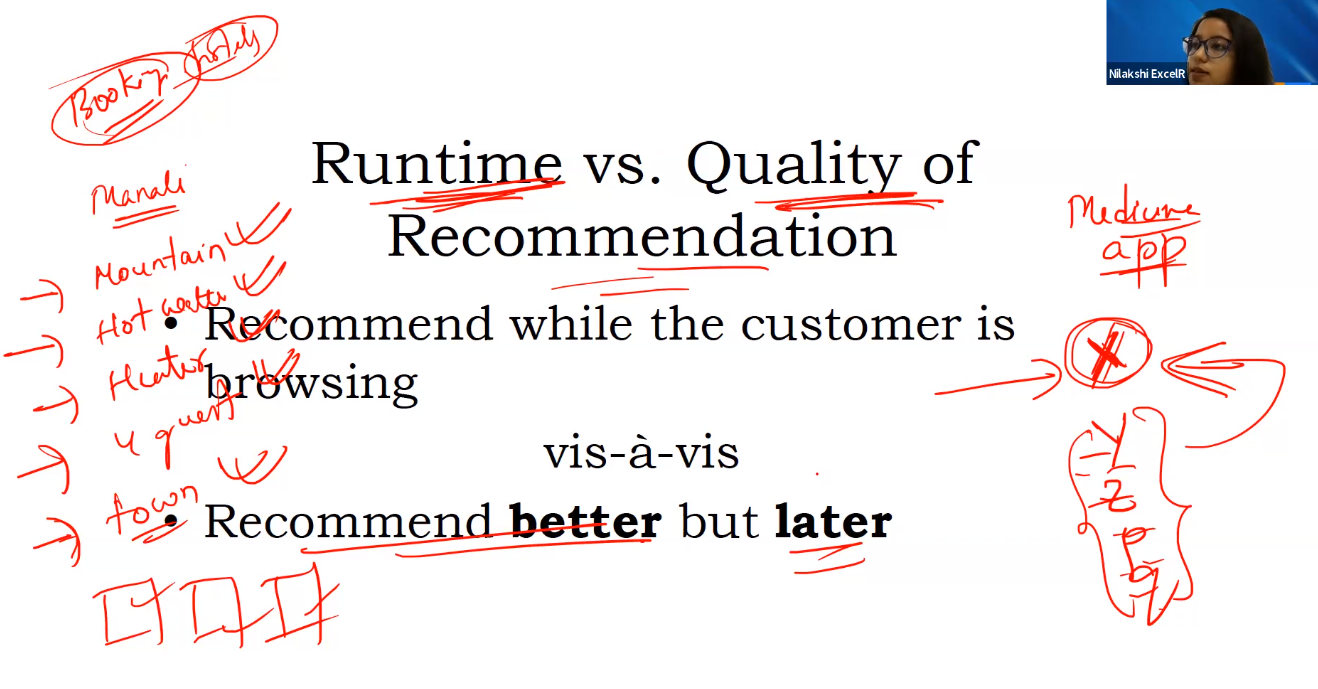

###How to address Cold Start?

- Approaches to address cold start with (new users):
  - Popular items(get quick reaction of the users)
  - Demographically relevant items
  - Browsing history
  - Secondary source of data --- social network, subsciption
  - Netflix - start with rating a few movies
- Approaches to address cold start with (new item):
  - Recommend to random users/or some selective users based on certain criteria
  - How about offering the product to influential people in the social network.

#Recommendation System Code

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_csv("Movie.csv")
movies.head()

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [ ]:
print(movies["movie"].nunique())
movies['movie'].value_counts() #unique movies count

10


Toy Story (1995)                      2569
GoldenEye (1995)                      1548
Heat (1995)                           1260
Jumanji (1995)                        1155
Sabrina (1995)                         700
Grumpier Old Men (1995)                685
Father of the Bride Part II (1995)     657
Sudden Death (1995)                    202
Waiting to Exhale (1995)               138
Tom and Huck (1995)                     78
Name: movie, dtype: int64

In [ ]:
movies.sort_values('userId')
movies.shape

(8992, 3)

In [ ]:
#number of unique users in the dataset
len(movies.userId.unique())
# movies['userId].nunique()

4081

In [ ]:
movies['rating'].value_counts()

3.0    2736
4.0    2660
5.0    1394
3.5     679
2.0     542
4.5     374
2.5     277
1.0     212
1.5      61
0.5      57
Name: rating, dtype: int64

In [ ]:
len(movies.movie.unique())

10

In [ ]:
user_movies = movies.pivot(index = "userId",
                           columns = "movie",
                           values = "rating")

In [ ]:
user_movies.head()

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Impute NaNs with 0 values
user_movies.fillna(0, inplace=True)

In [ ]:
user_movies

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [ ]:
#Calculating Cosine Similarity between users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
user_sim = 1 - pairwise_distances(user_movies.values, metric='cosine')

In [ ]:
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [ ]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,1.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,1.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543


In [ ]:
movies.userId.unique()

array([   3,    6,    8, ..., 7080, 7087, 7105])

In [ ]:
#set the index and column names to user ids
user_sim_df.index = movies.userId.unique()
user_sim_df.columns = movies.userId.unique()

In [ ]:
user_sim_df.iloc[0:15,0:15]

,3,6,8,10,11,12,13,14,16,19,22,23,24,31,34
3,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.514496,0.000000,0.000000,0.000000
6,0.000000,1.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,0.437595,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,0.583460,0.685994,0.789352,0.000000,0.707107
10,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,0.262557,0.411597,0.000000,0.800000,0.424264
11,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.514496,0.000000,0.000000,0.000000
12,0.000000,0.390567,0.650945,0.000000,0.000000,1.000000,0.736460,0.560880,0.650945,0.569028,0.835560,0.446544,0.913466,0.000000,0.460287
13,0.000000,0.707107,0.000000,0.000000,0.000000,0.736460,1.000000,0.435194,0.000000,0.000000,0.618853,0.000000,0.434122,0.000000,0.000000
14,0.000000,0.615457,0.492366,0.615457,0.000000,0.560880,0.435194,1.000000,0.492366,0.669519,0.718190,0.591080,0.388650,0.492366,0.609272
16,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,0.583460,0.685994,0.789352,0.000000,0.707107
19,0.000000,0.000000,0.874157,0.388514,0.000000,0.569028,0.000000,0.669519,0.874157,1.000000,0.510036,0.849528,0.690018,0.485643,0.618123


In [ ]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:15,0:15]

,3,6,8,10,11,12,13,14,16,19,22,23,24,31,34
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.514496,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,0.437595,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,0.583460,0.685994,0.789352,0.000000,0.707107
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,0.262557,0.411597,0.000000,0.800000,0.424264
11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.514496,0.000000,0.000000,0.000000
12,0.000000,0.390567,0.650945,0.000000,0.000000,0.000000,0.736460,0.560880,0.650945,0.569028,0.835560,0.446544,0.913466,0.000000,0.460287
13,0.000000,0.707107,0.000000,0.000000,0.000000,0.736460,0.000000,0.435194,0.000000,0.000000,0.618853,0.000000,0.434122,0.000000,0.000000
14,0.000000,0.615457,0.492366,0.615457,0.000000,0.560880,0.435194,0.000000,0.492366,0.669519,0.718190,0.591080,0.388650,0.492366,0.609272
16,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,0.000000,0.874157,0.583460,0.685994,0.789352,0.000000,0.707107
19,0.000000,0.000000,0.874157,0.388514,0.000000,0.569028,0.000000,0.669519,0.874157,0.000000,0.510036,0.849528,0.690018,0.485643,0.618123


In [ ]:
#most similar users
user_sim_df.idxmax(axis=1)[0:15]

3       11
6      168
8       16
10    4047
11       3
12    6676
13    5953
14    4138
16       8
19    3603
22    3003
23    2096
24     539
31      66
34      93
dtype: int64

In [ ]:
movies[(movies['userId']==22) | (movies["userId"]==3003)]

,userId,movie,rating
10,22,Toy Story (1995),3.0
1108,3003,Toy Story (1995),5.0
5211,22,Heat (1995),5.0
5740,3003,Heat (1995),5.0


In [ ]:
user_1 = movies[movies["userId"]==6]
user_1

,userId,movie,rating
1,6,Toy Story (1995),5.0
3725,6,Grumpier Old Men (1995),3.0
6464,6,Sabrina (1995),5.0


In [ ]:
user_2 = movies[movies["userId"]==168]
user_2

,userId,movie,rating
60,168,Toy Story (1995),4.5


In [ ]:
movies_watched_by_user1 = list(set(user_1.movie))
movies_watched_by_user2 = list(set(user_2.movie))

for movie_name in movies_watched_by_user1:
  if movie_name not in movies_watched_by_user2:
    print('Recommendation : ', movie_name)

Recommendation :  Sabrina (1995)
Recommendation :  Grumpier Old Men (1995)
